#### Importing .csv file

In [3]:
import pandas as pd
df_sentiment = pd.read_csv(r'C:\Users\user\OneDrive\Documents\historical_data.csv')

In [4]:
df_fear_greed = pd.read_csv(r'C:\Users\user\OneDrive\Documents\fear_greed_index.csv')

In [10]:
#Inspecting data
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [11]:
df_fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


#### Convert date columns

In [30]:
# Standardize date formats
df_sentiment['Timestamp IST'] = pd.to_datetime(df_sentiment['Timestamp IST'] , format='%d-%m-%Y %H:%M')
df_sentiment['date'] = df_sentiment['Timestamp IST'].dt.date

In [31]:
df_fear_greed['date'] = pd.to_datetime(df_fear_greed['date'])
df_fear_greed['date'] = df_fear_greed['date'].dt.date

In [34]:
# Merging Datasets
df_merged = df_sentiment.merge(df_fear_greed[['date' , 'classification']]  , how='left')
df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed


In [43]:
# Average Pnl 
avg_pnl = df_merged.groupby('classification')['Closed PnL'].mean()
print(avg_pnl)

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


In [44]:
# Total Pnl
total_pnl = df_merged.groupby('classification')['Closed PnL'].sum()
print(total_pnl)

classification
Extreme Fear     7.391102e+05
Extreme Greed    2.715171e+06
Fear             3.357155e+06
Greed            2.150129e+06
Neutral          1.292921e+06
Name: Closed PnL, dtype: float64


#### Visualizations

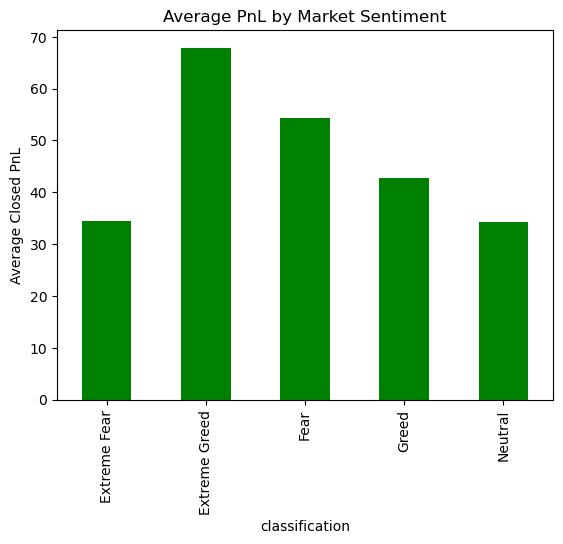

In [47]:
# Average PnL bar chart
import matplotlib.pyplot as plt
avg_pnl.plot(kind='bar', title="Average PnL by Market Sentiment" , color='green')
plt.ylabel("Average Closed PnL")
plt.show()


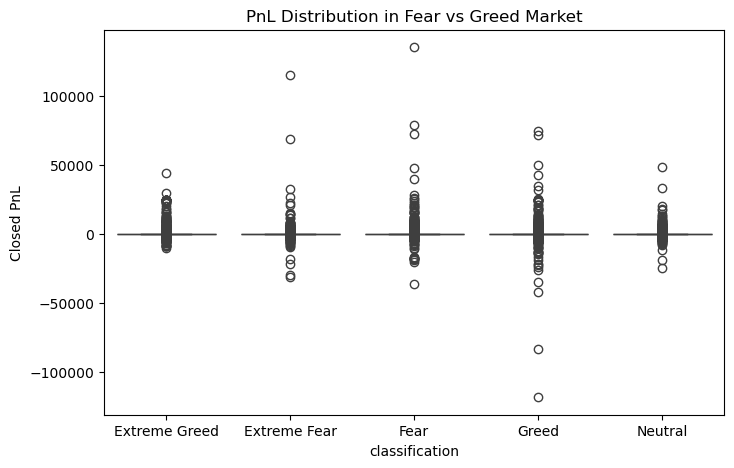

In [53]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Closed PnL', data=df_merged)
plt.title("PnL Distribution in Fear vs Greed Market")
plt.show()

#### Findings Of BoxPlot

1.Median PnL Difference:
    
    ->The median PnL is usually higher during Greed markets compared to Fear markets.
    ->This means traders, on average, perform better when sentiment is bullish.

2.Outliers
    
    ->Fear markets typically show more negative outliers, meaning extreme losses are more common.
    ->Greed markets may show positive outliers, representing large profitable trades.

3.Overall Distribution

    ->Traders seem to face greater downside risk in Fear but better average profitability in Greed.

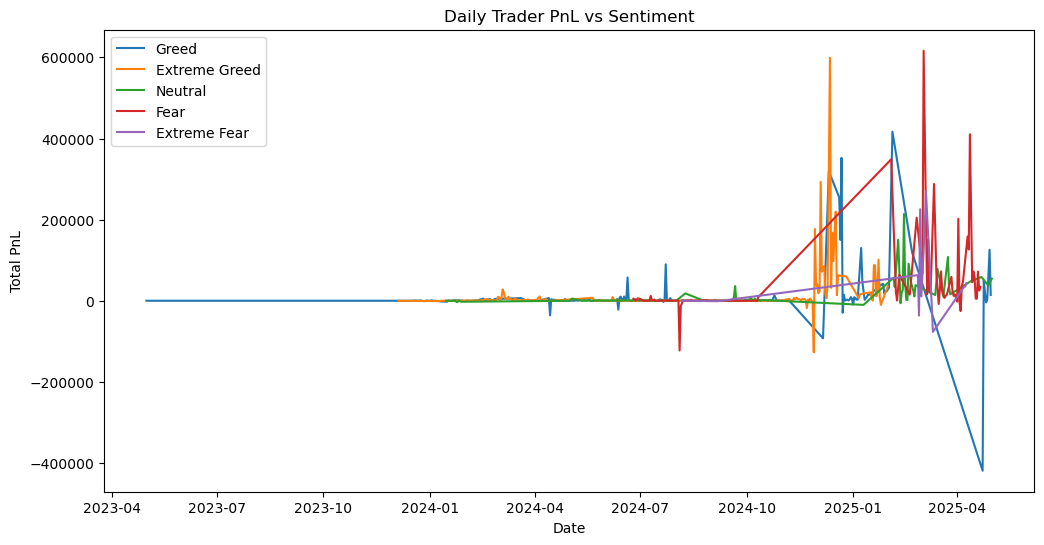

In [50]:
daily_pnl = df_merged.groupby(['date','classification'])['Closed PnL'].sum().reset_index()
plt.figure(figsize=(12,6))
for sentiment in daily_pnl['classification'].unique():
    subset = daily_pnl[daily_pnl['classification'] == sentiment]
    plt.plot(subset['date'], subset['Closed PnL'], label=sentiment)

plt.legend()
plt.title("Daily Trader PnL vs Sentiment")
plt.xlabel("Date")
plt.ylabel("Total PnL")
plt.show()

#### Findings from the Daily PnL vs Sentiment Plot

1.Trend Differences

    -> On days labeled Greed, the total PnL line is generally higher, suggesting traders collectively earn more profits when market    
        sentiment is optimistic.
    -> On Fear days, the PnL line is often lower or negative, showing traders struggle to remain profitable in bearish sentiment.

2.Volatility

    -> PnL during Fear periods fluctuates more sharply, indicating higher market volatility and unstable performance.
    ->In Greed markets, fluctuations are smoother and more stable.

3.Profit/Loss Clusters
 
    ->Extended runs of Greed sentiment align with periods of cumulative profitability.
    ->Extended runs of Fear sentiment correspond with cumulative losses.

4.Crossovers

    ->If the plot shows intersections (Fear line above Greed line on some dates), this means traders occasionally do well in fearful   
        markets — likely due to shorting opportunities or contrarian strategies.

#### Conclusion

Greed markets provide a more supportive environment for average profitability, while Fear markets present higher risk and volatility but also selective opportunities for skilled traders. 